In [3]:
import pandas as pd
import math
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy import stats
import seaborn as sns
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import ensemble
%matplotlib inline

In [48]:
### Load the data downloaded through SQL query
df = pd.read_csv("Sep_2018_V3.csv")
df.shape

(1684174, 30)

In [341]:
## fill nan with 0
df['appointment_total_counts']=df['appointment_total_counts'].fillna(0)
df.iloc[:,1:].head()

,#_days_since_capture,peloton_user.account_age,user_created_from_ios_app,user_created_from_commercial_bike,user_created_from_home_bike,captured_consumer_lead.product_interest_bike,lead_source_inside_sales,lead_source_web,lead_source_retail,free_trial_browse_category_first_workout_cycling,...,affirm_session_past_2month,count_studio_bike_class,count_studio_bike_pastyear,count_other_hardware_workout,count_other_hardware_pastyear,count_digital_workout,count_digital_pastyear,converted_within_60_day,converted_between_60_to_120_days,converted_between_120_to_365_days
0,252,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,322,322,0,1,0,1,0,0,0,0,...,0,0,0,3,3,0,0,0,0,0
2,634,237,0,0,1,1,0,1,0,0,...,0,0,0,3,3,0,0,0,0,0
3,553,553,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,206,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
df.dtypes

captured_consumer_lead.email                         object
#_days_since_capture                                  int64
peloton_user.account_age                            float64
user_created_from_ios_app                             int64
user_created_from_commercial_bike                     int64
user_created_from_home_bike                           int64
captured_consumer_lead.product_interest_bike          int64
lead_source_inside_sales                              int64
lead_source_web                                       int64
lead_source_retail                                    int64
free_trial_browse_category_first_workout_cycling      int64
peloton_user.is_facebook_connected                    int64
appointment_total_counts                            float64
web_session_count_past_year                           int64
web_session_past_2month                               int64
bike_session_count_past_year                          int64
bike_session_past_2month                

In [117]:
df = df.rename(columns = {'bike_session_count_past_year [ambiguous column 17]': 'bike_session_past_2month'})
               

In [274]:
df.describe()

,#_days_since_capture,peloton_user.account_age,user_created_from_ios_app,user_created_from_commercial_bike,user_created_from_home_bike,captured_consumer_lead.product_interest_bike,lead_source_inside_sales,lead_source_web,lead_source_retail,free_trial_browse_category_first_workout_cycling,...,affirm_session_past_2month,count_studio_bike_class,count_studio_bike_pastyear,count_other_hardware_workout,count_other_hardware_pastyear,count_digital_workout,count_digital_pastyear,converted_within_60_day,converted_between_60_to_120_days,converted_between_120_to_365_days
count,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,...,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06,1.684174e+06
mean,3.579839e+02,1.784517e+02,2.662937e-01,1.249966e-01,3.894431e-02,8.734204e-01,4.641504e-02,2.438834e-01,6.068672e-02,8.824326e-02,...,1.646683e-02,1.720358e+00,4.666578e-01,2.145577e+01,1.343180e+01,6.368786e+00,4.846553e+00,4.652132e-03,1.133493e-02,1.390711e-02
std,2.994136e+02,2.776113e+02,4.420198e-01,3.307151e-01,1.934623e-01,3.325015e-01,2.103823e-01,4.294233e-01,2.387548e-01,2.836484e-01,...,2.476883e+00,1.446676e+02,4.797705e+01,8.927285e+02,5.125478e+02,2.323478e+02,1.921850e+02,6.804772e-02,1.058606e-01,1.171056e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.400000e+02,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.350000e+02,2.760000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.866000e+03,1.849000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.602000e+03,7.117000e+04,3.135000e+04,3.540510e+05,2.539350e+05,1.295000e+05,1.295000e+05,1.000000e+00,1.000000e+00,1.000000e+00


## Visualization

Text(0, 0.5, 'Count')

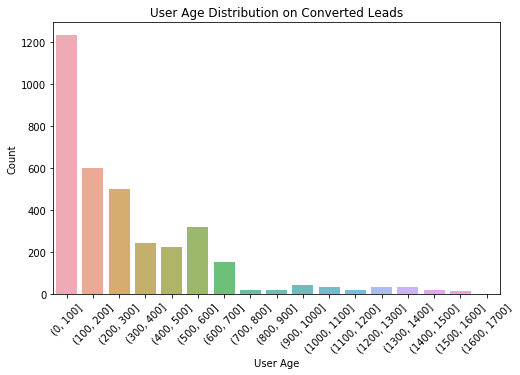

In [332]:
df['peloton_user.account_age'] = df['peloton_user.account_age'].astype(int)
account_age_hist = pd.DataFrame(df[df['converted_within_60_day']==1]['peloton_user.account_age'])

account_age_hist['count_range'] = pd.cut(x = account_age_hist['peloton_user.account_age'],
                                         bins = pd.interval_range(start = 0, 
                                                                  end = max(account_age_hist['peloton_user.account_age']), 
                                                                  freq = 100))
counts = account_age_hist['count_range'].value_counts()


sns.barplot(counts.index, counts.values, alpha=0.8)
plt.xticks(rotation=45)
plt.title('User Age Distribution on Converted Leads')
plt.xlabel('User Age')
plt.ylabel('Count')

In [325]:
account_age_table = df[['peloton_user.account_age', 'converted_within_60_day']]
account_age_table['count_range'] = pd.cut(x = account_age_table['peloton_user.account_age'],
                                         bins = pd.interval_range(start = 0, 
                                                                  end = max(account_age_table['peloton_user.account_age']), 
                                                                  freq = 100))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0, 0.5, 'Conversion Rate')

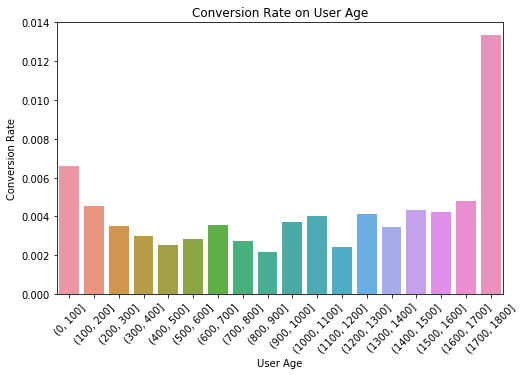

In [331]:
sns.barplot(x="count_range", y="converted_within_60_day", data=account_age_table, ci = None)
plt.xticks(rotation=45)
plt.title('Conversion Rate on User Age')
plt.xlabel('User Age')
plt.ylabel('Conversion Rate')

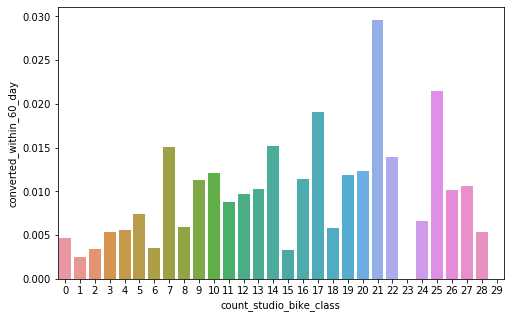

In [334]:
sns.barplot(x="count_studio_bike_class", y="converted_within_60_day", data=df[df['count_studio_bike_class']<30], ci = None)

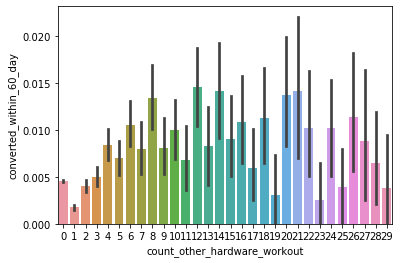

In [22]:
sns.barplot(x="count_other_hardware_workout", y="converted_within_60_day", data=df[df['count_other_hardware_workout']<30])

In [21]:
df['count_other_hardware_workout'].value_counts()

0        1374692
1         124920
2          43955
3          19815
4          12288
5           7449
6           6739
8           4265
7           4147
9           3201
10          3192
12          2886
11          2207
14          1974
16          1843
15          1770
18          1691
13          1689
20          1454
24          1373
17          1185
22          1170
21          1134
30          1025
19           959
28           923
36           901
26           880
32           830
27           794
          ...   
5678           1
3626           1
2603           1
4648           1
21024          1
36408          1
7722           1
76300          1
3625           1
17952          1
8748           1
5677           1
8757           1
3632           1
4662           1
569            1
3638           1
5685           1
23100          1
6710           1
10800          1
1587           1
4656           1
5681           1
7728           1
1586           1
5680           1
12852         

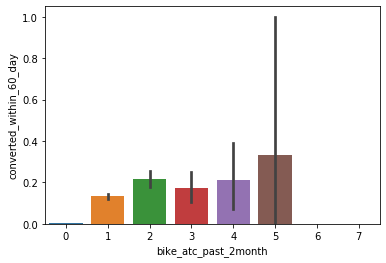

In [10]:
sns.barplot(x="bike_atc_past_2month", y="converted_within_60_day", data=df)

In [11]:
df['bike_atc_past_2month'].value_counts()

0    1680551
1       3044
2        432
3         87
4         28
6          4
5          3
7          1
Name: bike_atc_past_2month, dtype: int64

In [14]:
df['web_session_count_past_year'].value_counts()

0      1520539
1        95908
2        32134
3        13913
4         7529
5         4104
6         2729
7         1742
8         1270
9          842
10         686
11         447
12         392
13         302
14         234
15         175
16         159
17         124
18          94
20          76
19          72
24          61
23          50
22          49
21          47
26          36
25          35
30          26
28          26
32          23
        ...   
139          1
142          1
147          1
148          1
159          1
169          1
173          1
182          1
227          1
270          1
280          1
101          1
97           1
96           1
71           1
57           1
60           1
62           1
66           1
68           1
70           1
72           1
91           1
75           1
80           1
85           1
86           1
88           1
89           1
55           1
Name: web_session_count_past_year, Length: 112, dtype: int64

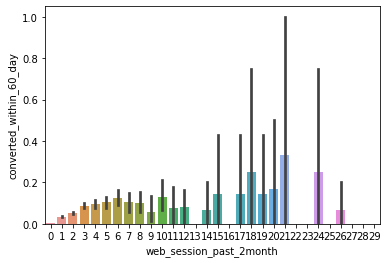

In [19]:
sns.barplot(x="web_session_past_2month", y="converted_within_60_day", data=df[df['web_session_past_2month']<30])

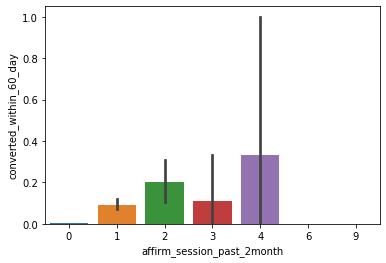

In [22]:

sns.barplot(x="affirm_session_past_2month", y="converted_within_60_day", data=df)

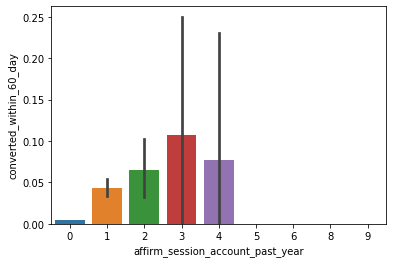

In [25]:
sns.barplot(x="affirm_session_account_past_year", y="converted_within_60_day", data=df)

In [26]:
df['affirm_session_account_past_year'].value_counts()

0    1682434
1       1482
2        186
3         28
4         13
6          3
5          2
9          1
8          1
Name: affirm_session_account_past_year, dtype: int64

In [170]:
df['peloton_user.is_facebook_connected'].value_counts()

0    1655504
1      28670
Name: peloton_user.is_facebook_connected, dtype: int64

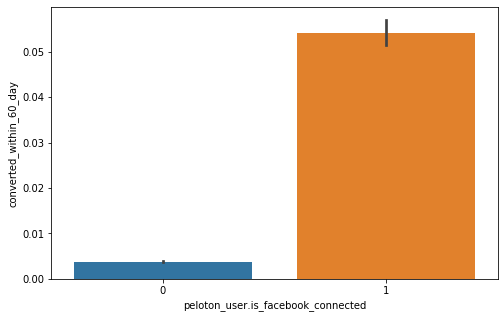

In [344]:
sns.barplot(x="peloton_user.is_facebook_connected", y="converted_within_60_day", data=df)

### Prepare train set: Split into train and test 0.7/0.3

In [118]:
train, test = train_test_split(df, test_size=0.3)
print('train.shape:', train.shape)
print('test.shape:', test.shape)

train.shape: (1178921, 30)
test.shape: (505253, 30)


##  Use 'converted_within_60_day' for target variable

In [119]:
y_train_60 = train['converted_within_60_day'] 
y_test_60 = test['converted_within_60_day']
x_train = train.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
x_test = test.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day', 
                              'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])

In [108]:
x_train.head()

,#_days_since_capture,peloton_user.account_age,user_created_from_ios_app,user_created_from_commercial_bike,user_created_from_home_bike,captured_consumer_lead.product_interest_bike,lead_source_inside_sales,lead_source_web,lead_source_retail,free_trial_browse_category_first_workout_cycling,...,bike_atc_past_year,bike_atc_past_2month,affirm_session_account_past_year,affirm_session_past_2month,count_studio_bike_class,count_studio_bike_pastyear,count_other_hardware_workout,count_other_hardware_pastyear,count_digital_workout,count_digital_pastyear
889704,74,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
347840,288,288.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1540224,376,376.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2448334,490,490.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
543137,1007,1007.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### PAUSE: Iterate through different parameters

In [147]:
n_estimators = [1000]
learning_rate = [0.03, 0.05]

estimator_list=[]
learning_rate_list=[]
        
capture_count_train=[]
capture_count_test=[]

pct = input('Please enter a integer w/o percentage (e.g. Enter "20" for 20%): ')

for n in n_estimators:
    for l in learning_rate:
        
        params = {'n_estimators': n,
                 'max_depth':6,
                 'learning_rate': l}
        
        x_train = train.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
        
        x_test = test.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day', 
                              'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
        
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
        gradient_boosting_regressor.fit(x_train, y_train_60)
        
        
        Predict_train = gradient_boosting_regressor.predict(x_train)
        Predict_test = gradient_boosting_regressor.predict(x_test)
        
        x_train['Predict'] = Predict_train
        x_train['Y'] = y_train_60
        train_analysis_order = x_train.sort_values(by = ['Predict'], ascending = False)
        
        x_test['Predict'] = Predict_test
        x_test['Y'] = y_test_60
        test_analysis_order = x_test.sort_values(by = ['Predict'], ascending = False)

        num_train = int(int(pct)/100*len(train_analysis_order))
        top_train = train_analysis_order.iloc[:num_train,:]
        
        num_test = int(int(pct)/100*len(test_analysis_order))
        top_test = test_analysis_order.iloc[:num_test,:]
        
        
        estimator_list.append(n)
        learning_rate_list.append(l)
        
        capture_count_train.append(len(top_train[top_train['Y'] == 1]))
        capture_count_test.append(len(top_test[top_test['Y'] == 1]))


Please enter a integer w/o percentage (e.g. Enter "20" for 20%): 20


In [148]:
capture_table_v3 = pd.DataFrame({'n_estimators': estimator_list, 'Learning Rate': learning_rate_list, 
                   'train_captures': capture_count_train, 'test_captured': capture_count_test}) 
capture_table_v3['Total Conversion: Train'] = len(x_train[x_train['Y']==1])
capture_table_v3['Total Conversion: Test'] = len(x_test[x_test['Y']==1])
capture_table_v3

,n_estimators,Learning Rate,train_captures,test_captured,Total Conversion: Train,Total Conversion: Test
0,1000,0.03,4221,1841,5409,2426
1,1000,0.05,4256,1833,5409,2426


In [146]:
capture_table_v2 = pd.DataFrame({'n_estimators': estimator_list, 'Learning Rate': learning_rate_list, 
                   'train_captures': capture_count_train, 'test_captured': capture_count_test}) 
capture_table_v2['Total Conversion: Train'] = len(x_train[x_train['Y']==1])
capture_table_v2['Total Conversion: Test'] = len(x_test[x_test['Y']==1])
capture_table_v2

,n_estimators,Learning Rate,train_captures,test_captured,Total Conversion: Train,Total Conversion: Test
0,300,0.01,3865,1758,5409,2426
1,300,0.03,4051,1832,5409,2426
2,300,0.05,4124,1838,5409,2426
3,500,0.01,3931,1784,5409,2426
4,500,0.03,4168,1853,5409,2426
5,500,0.05,4181,1838,5409,2426


In [144]:
capture_table_v1 = pd.DataFrame({'n_estimators': estimator_list, 'Learning Rate': learning_rate_list, 
                   'train_captures': capture_count_train, 'test_captured': capture_count_test}) 
capture_table_v1['Total Conversion: Train'] = len(x_train[x_train['Y']==1])
capture_table_v1['Total Conversion: Test'] = len(x_test[x_test['Y']==1])
capture_table_v1

,n_estimators,Learning Rate,train_captures,test_captured,Total Conversion: Train,Total Conversion: Test
0,200,0.05,4080,1836,5409,2426
1,200,0.10,4169,1835,5409,2426
2,200,0.20,4221,1817,5409,2426
3,300,0.05,4124,1838,5409,2426
4,300,0.10,4212,1837,5409,2426
5,300,0.20,4289,1813,5409,2426


## Feature Importance Table

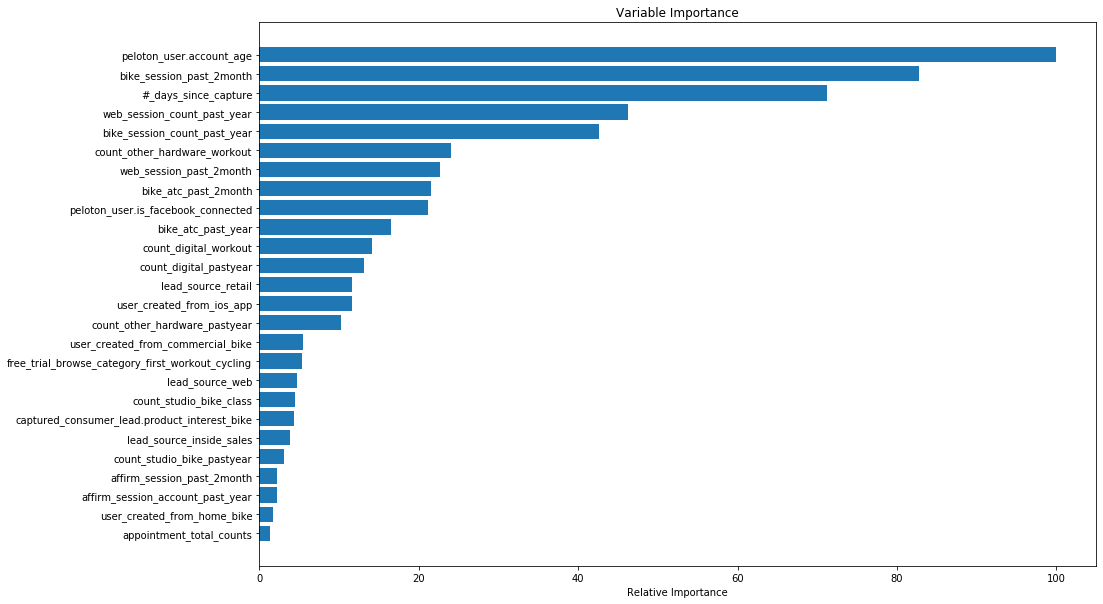

In [168]:
importance_table = gradient_boosting_regressor.feature_importances_
importance_table = importance_table/max(importance_table)*100
sorted_importance_table = np.argsort(importance_table)

x_label = np.arange(sorted_importance_table.shape[0]) + .5
plt.barh(x_label, importance_table[sorted_importance_table], align='center')
plt.yticks(x_label, x_train.columns[sorted_importance_table])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
plt.show()

## Cr: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

In [169]:
x_train.columns[sorted_importance_table]

Index(['appointment_total_counts', 'user_created_from_home_bike',
       'affirm_session_account_past_year', 'affirm_session_past_2month',
       'count_studio_bike_pastyear', 'lead_source_inside_sales',
       'captured_consumer_lead.product_interest_bike',
       'count_studio_bike_class', 'lead_source_web',
       'free_trial_browse_category_first_workout_cycling',
       'user_created_from_commercial_bike', 'count_other_hardware_pastyear',
       'user_created_from_ios_app', 'lead_source_retail',
       'count_digital_pastyear', 'count_digital_workout', 'bike_atc_past_year',
       'peloton_user.is_facebook_connected', 'bike_atc_past_2month',
       'web_session_past_2month', 'count_other_hardware_workout',
       'bike_session_count_past_year', 'web_session_count_past_year',
       '#_days_since_capture', 'bike_session_past_2month',
       'peloton_user.account_age'],
      dtype='object')

## Cross Validate through Different Year/Month

### CDR Chart: Train using 06/2018 (df2) & Test using 06/2018 (df2)

In [ ]:
df2 = pd.read_csv("June_2018_V3.csv")

## fill nan with 0
df2['appointment_total_counts']=df2['appointment_total_counts'].fillna(0)


train2, test2 = train_test_split(df2, test_size=0.3)
print('train.shape:', train2.shape)
print('test.shape:', test2.shape)

In [211]:
x_test2 = test2.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
y_test2_60 = test2['converted_within_60_day'] 

Predict_test = gradient_boosting_regressor.predict(x_test2)

x_test2['Predict'] = Predict_test
x_test2['Y'] = y_test2_60
test_analysis_order = x_test2.sort_values(by = ['Predict'], ascending = False)


pct_list1 = []
capture_count_test1=[]
total_conversion1=[]
CDR1=[]

for pct in range(10, 100, 10):
        
    num_test = int(int(pct)/100*len(test_analysis_order))
    top_test = test_analysis_order.iloc[:num_test,:]
      
    pct_list1.append(pct)
    capture_count_test1.append(len(top_test[top_test['Y'] == 1]))
    total_conversion1.append(len(x_test2[x_test2['Y']==1]))
    CDR1.append(round(len(top_test[top_test['Y'] == 1]) / len(x_test2[x_test2['Y']==1]), 2))
    
CDR_table1 = pd.DataFrame({'Top Percentage': pct_list1, '# of Convertion Captured': capture_count_test1,
                         'Total # of Conversion': total_conversion1, 
                          'Conversion Detection Rate': CDR1})
CDR_table1

,Top Percentage,# of Convertion Captured,Total # of Conversion,Conversion Detection Rate
0,10,1189,1829,0.65
1,20,1373,1829,0.75
2,30,1485,1829,0.81
3,40,1585,1829,0.87
4,50,1641,1829,0.90
5,60,1704,1829,0.93
6,70,1747,1829,0.96
7,80,1782,1829,0.97
8,90,1802,1829,0.99


In [212]:
CDR1

[0.65, 0.75, 0.81, 0.87, 0.9, 0.93, 0.96, 0.97, 0.99]

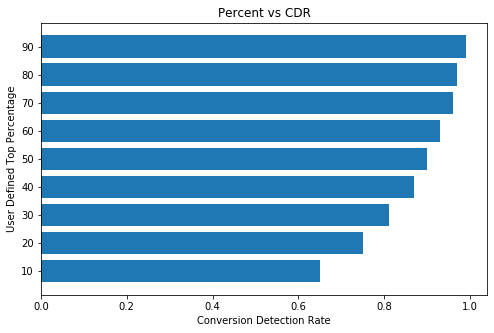

In [217]:
y_pos = np.arange(len(pct_list1))

plt.barh(y_pos, CDR1)
plt.yticks(y_pos, pct_list1)
plt.xlabel('Conversion Detection Rate')
plt.ylabel('User Defined Top Percentage')
plt.title('Percent vs CDR')
matplotlib.rcParams['figure.figsize'] = (8, 5)
plt.show()

In [228]:
x_test2['Y_120'] = test2['converted_between_60_to_120_days'] 
x_test2['Y_365'] = test2['converted_between_120_to_365_days']

In [241]:
test_analysis_order.iloc[:, 10:20].head()

,peloton_user.is_facebook_connected,appointment_total_counts,web_session_count_past_year,web_session_past_2month,bike_session_count_past_year,bike_session_past_2month,bike_atc_past_year,bike_atc_past_2month,affirm_session_account_past_year,affirm_session_past_2month
320358,1,0.0,424,424,424,424,212,212,0,0
340603,0,0.0,51,51,51,51,0,0,0,0
1304870,1,0.0,378,378,252,252,252,252,252,252
863095,1,0.0,355,355,355,355,355,355,0,0
680061,0,0.0,3132,3132,1740,1740,348,348,0,0


In [243]:
test_analysis_order = x_test2.sort_values(by = ['Predict'], ascending = False)
test_analysis_order.loc[:, ['bike_atc_past_year', 'bike_atc_past_2month', 
                            'bike_session_count_past_year', 'bike_session_past_2month', 'Predict', 'Y']].head(10)

,bike_atc_past_year,bike_atc_past_2month,bike_session_count_past_year,bike_session_past_2month,Predict,Y
320358,212,212,424,424,1.081910,0
340603,0,0,51,51,1.078113,0
1304870,252,252,252,252,1.033448,1
863095,355,355,355,355,1.000527,1
680061,348,348,1740,1740,0.987736,1
129581,0,0,18,18,0.939684,0
294787,875,875,1750,1575,0.935739,1
349152,213,213,213,213,0.923194,1
1342830,682,682,1364,682,0.916027,0
360006,0,0,74,74,0.911408,1


## Conversion Detection Rate

### CDR Chart: Train using 06/2018 (df2) & Test using 11/2018 (df4)

In [199]:
df4 = pd.read_csv("Nov_2018_V3.csv")

## fill nan with 0
df4['appointment_total_counts']=df4['appointment_total_counts'].fillna(0)

x_test4 = df4.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
y_test4_60 = df4['converted_within_60_day'] 

Predict_test = gradient_boosting_regressor.predict(x_test4)
        
x_test4['Predict'] = Predict_test
x_test4['Y'] = y_test4_60
test_analysis_order = x_test4.sort_values(by = ['Predict'], ascending = False)

In [200]:
pct_list4 = []
capture_count_test4=[]
total_conversion4=[]
CDR4=[]

for pct in range(10, 100, 10):
        
    num_test = int(int(pct)/100*len(test_analysis_order))
    top_test = test_analysis_order.iloc[:num_test,:]
      
    pct_list4.append(pct)
    capture_count_test4.append(len(top_test[top_test['Y'] == 1]))
    total_conversion4.append(len(x_test4[x_test4['Y']==1]))
    CDR4.append(round(len(top_test[top_test['Y'] == 1]) / len(x_test4[x_test4['Y']==1]), 2))
    
CDR_table4 = pd.DataFrame({'Top Percentage': pct_list4, '# of Convertion Captured': capture_count_test4,
                         'Total # of Conversion': total_conversion4, 
                          'Conversion Detection Rate': CDR4})
CDR_table4

,Top Percentage,# of Convertion Captured,Total # of Conversion,Conversion Detection Rate
0,10,13680,24425,0.56
1,20,16353,24425,0.67
2,30,18436,24425,0.75
3,40,20066,24425,0.82
4,50,21228,24425,0.87
5,60,22081,24425,0.90
6,70,22696,24425,0.93
7,80,23006,24425,0.94
8,90,23412,24425,0.96


In [208]:
CDR4

[0.56, 0.67, 0.75, 0.82, 0.87, 0.9, 0.93, 0.94, 0.96]

In [ ]:
#########

### CDR Chart: Train using 11/2017 (df6) & Test using 11/2018 (df4)

In [349]:
df6 = pd.read_csv("Nov_2017_V3.csv")

## fill nan with 0
df6['appointment_total_counts']=df6['appointment_total_counts'].fillna(0)

y_train6_60 = df6['converted_within_60_day'] 
x_train6 = df6.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
x_test4 = df4.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
y_test4_60 = df4['converted_within_60_day'] 
x_test4.head()

,#_days_since_capture,peloton_user.account_age,user_created_from_ios_app,user_created_from_commercial_bike,user_created_from_home_bike,captured_consumer_lead.product_interest_bike,lead_source_inside_sales,lead_source_web,lead_source_retail,free_trial_browse_category_first_workout_cycling,...,bike_atc_past_year,bike_atc_past_2month,affirm_session_account_past_year,affirm_session_past_2month,count_studio_bike_class,count_studio_bike_pastyear,count_other_hardware_workout,count_other_hardware_pastyear,count_digital_workout,count_digital_pastyear
0,847,0.0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,344,344.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,27,27,0,0
2,635,636.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,156,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [350]:
params = {'n_estimators': 500,
          'max_depth':6,
          'learning_rate': 0.03}
        
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor.fit(x_train6, y_train6_60)
Predict_test = gradient_boosting_regressor.predict(x_test4)

x_test4['Predict'] = Predict_test
x_test4['Y'] = y_test4_60
test_analysis_order = x_test4.sort_values(by = ['Predict'], ascending = False)

pct_list6 = []
capture_count_test6=[]
total_conversion6=[]
CDR6=[]

for pct in range(10, 100, 10):
        
    num_test = int(int(pct)/100*len(test_analysis_order))
    top_test = test_analysis_order.iloc[:num_test,:]
      
    pct_list6.append(pct)
    capture_count_test6.append(len(top_test[top_test['Y'] == 1]))
    total_conversion6.append(len(x_test4[x_test4['Y']==1]))
    CDR6.append(round(len(top_test[top_test['Y'] == 1]) / len(x_test4[x_test4['Y']==1]), 2))

CDR_table6 = pd.DataFrame({'Top Percentage': pct_list6, '# of Convertion Captured': capture_count_test6,
                         'Total # of Conversion': total_conversion6, 
                          'Conversion Detection Rate': CDR6})
CDR_table6

,Top Percentage,# of Convertion Captured,Total # of Conversion,Conversion Detection Rate
0,10,13590,24425,0.56
1,20,16039,24425,0.66
2,30,17956,24425,0.74
3,40,19696,24425,0.81
4,50,20667,24425,0.85
5,60,21170,24425,0.87
6,70,22000,24425,0.90
7,80,22728,24425,0.93
8,90,23363,24425,0.96


## Define Train&Test function
### Final version: *Gradient Boosting Trees*


In [352]:
def gradient_boosting_cdr(n_estimator, max_depth, learning_rate, x_train, y_train, x_test, y_test):
    
    params = {'n_estimators': n_estimator,
          'max_depth':max_depth,
          'learning_rate': learning_rate}
    
    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
    
    ## Train the model
    gradient_boosting_regressor.fit(x_train, y_train)
    
    ## Test the model
    Predict_test = gradient_boosting_regressor.predict(x_test)
    
    x_test['Predict'] = Predict_test
    x_test['Y'] = y_test
    test_analysis_order = x_test.sort_values(by = ['Predict'], ascending = False)
    
    pct_list = []
    capture_count_test=[]
    total_conversion=[]
    CDR=[]
    
    
    for pct in range(10, 100, 10):
        
        num_test = int(int(pct)/100*len(test_analysis_order))
        top_test = test_analysis_order.iloc[:num_test,:]
      
        pct_list.append(pct)
        capture_count_test.append(len(top_test[top_test['Y'] == 1]))
        total_conversion.append(len(x_test[x_test['Y']==1]))
        CDR.append(round(len(top_test[top_test['Y'] == 1]) / len(x_test[x_test['Y']==1]), 2))

    CDR_table = pd.DataFrame({'Top Percentage': pct_list, '# of Convertion Captured': capture_count_test,
                              'Total # of Conversion': total_conversion, 
                              'Conversion Detection Rate': CDR})
    
    return CDR_table

### CDR Chart: Train using 09/2018 (df) & Test using 11/2018 (df4)

In [353]:
### Prepare test and train sets
x_train = df.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])

y_train_60 = df['converted_within_60_day'] 

x_test4 = df4.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])

y_test4_60 = df4['converted_within_60_day'] 

x_test4.head()

,#_days_since_capture,peloton_user.account_age,user_created_from_ios_app,user_created_from_commercial_bike,user_created_from_home_bike,captured_consumer_lead.product_interest_bike,lead_source_inside_sales,lead_source_web,lead_source_retail,free_trial_browse_category_first_workout_cycling,...,bike_atc_past_year,bike_atc_past_2month,affirm_session_account_past_year,affirm_session_past_2month,count_studio_bike_class,count_studio_bike_pastyear,count_other_hardware_workout,count_other_hardware_pastyear,count_digital_workout,count_digital_pastyear
0,847,0.0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,344,344.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,27,27,0,0
2,635,636.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,156,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:
gradient_boosting_cdr(500, 6, 0.03, x_train, y_train_60, x_test4, y_test4_60)

,Top Percentage,# of Convertion Captured,Total # of Conversion,Conversion Detection Rate
0,10,13807,24425,0.57
1,20,16677,24425,0.68
2,30,18754,24425,0.77
3,40,20319,24425,0.83
4,50,21600,24425,0.88
5,60,22503,24425,0.92
6,70,23154,24425,0.95
7,80,23705,24425,0.97
8,90,24002,24425,0.98


### CDR Chart: Train using 05/2019 (df7) & Test using 06/2019 (df3)

In [355]:
### Prepare test and train sets
df7 = pd.read_csv("May_2019_V3.csv")

## fill nan with 0
df7['appointment_total_counts']=df7['appointment_total_counts'].fillna(0)
df7.head()

x_train7 = df7.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])

y_train7_60 = df7['converted_within_60_day'] 

x_test3 = df3.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])

y_test3_60 = df3['converted_within_60_day'] 

x_test3.head()

,#_days_since_capture,peloton_user.account_age,user_created_from_ios_app,user_created_from_commercial_bike,user_created_from_home_bike,captured_consumer_lead.product_interest_bike,lead_source_inside_sales,lead_source_web,lead_source_retail,free_trial_browse_category_first_workout_cycling,...,bike_atc_past_year,bike_atc_past_2month,affirm_session_account_past_year,affirm_session_past_2month,count_studio_bike_class,count_studio_bike_pastyear,count_other_hardware_workout,count_other_hardware_pastyear,count_digital_workout,count_digital_pastyear
0,715,715.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,36,12
1,481,481.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,32,12,0,0
2,814,0.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,769,0.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,844,729.0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,4,0


In [ ]:
gradient_boosting_cdr(500, 6, 0.03, x_train7, y_train7_60, x_test3, y_test3_60)

In [ ]:

######

### June 2018

In [ ]:
df2 = pd.read_csv("June_2018_V3.csv")

## fill nan with 0
df2['appointment_total_counts']=df2['appointment_total_counts'].fillna(0)


train2, test2 = train_test_split(df2, test_size=0.3)
print('train.shape:', train2.shape)
print('test.shape:', test2.shape)

In [85]:
y_test2_60 = test2['converted_within_60_day']

In [92]:
n_estimators = [200]
learning_rate = [0.1]

estimator_list=[]
learning_rate_list=[]
        
capture_count_train=[]
capture_count_test=[]

pct = input('Please enter a integer w/o percentage (e.g. Enter "20" for 20%): ')

for n in n_estimators:
    for l in learning_rate:
        
        params = {'n_estimators': n,
                 'max_depth':6,
                 'learning_rate': l}

        
        x_test = test2.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day', 
                              'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
        
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
        gradient_boosting_regressor.fit(x_train, y_train2_60)
        
        
        Predict_train = gradient_boosting_regressor.predict(x_train)
        Predict_test = gradient_boosting_regressor.predict(x_test)
        
        x_train['Predict'] = Predict_train
        x_train['Y'] = y_train2_60
        train_analysis_order = x_train.sort_values(by = ['Predict'], ascending = False)
        
        x_test['Predict'] = Predict_test
        x_test['Y'] = y_test2_60
        test_analysis_order = x_test.sort_values(by = ['Predict'], ascending = False)

        num_train = int(int(pct)/100*len(train_analysis_order))
        top_train = train_analysis_order.iloc[:num_train,:]
        
        num_test = int(int(pct)/100*len(test_analysis_order))
        top_test = test_analysis_order.iloc[:num_test,:]
        
        
        estimator_list.append(n)
        learning_rate_list.append(l)
        
        capture_count_train.append(len(top_train[top_train['Y'] == 1]))
        capture_count_test.append(len(top_test[top_test['Y'] == 1]))


Please enter a integer w/o percentage (e.g. Enter "20" for 20%): 20


In [93]:
train_captured_6_2018 = capture_count_train[0]
test_captured_6_2018 = capture_count_test[0]
train_total_6_2018 = len(x_train[x_train['Y'] == 1])
test_total_6_2018 = len(x_test[x_test['Y']==1])

In [95]:
test_captured_6_2018/test_total_6_2018

0.7459789240155297

In [100]:
print(train_captured_6_2018)
print(test_captured_6_2018)
print(train_total_6_2018)
print(test_total_6_2018)

3287
1345
4164
1803


### June 2019

In [97]:
df3 = pd.read_csv("June_2019_V3.csv")

## fill nan with 0
df3['appointment_total_counts']=df3['appointment_total_counts'].fillna(0)

train3, test3 = train_test_split(df3, test_size=0.3)
print('train.shape:', train3.shape)
print('test.shape:', test3.shape)

y_train3_60 = train3['converted_within_60_day'] 
y_test3_60 = test3['converted_within_60_day']

train.shape: (1982467, 30)
test.shape: (849630, 30)


In [101]:
n_estimators = [200]
learning_rate = [0.1]

estimator_list=[]
learning_rate_list=[]
        
capture_count_train=[]
capture_count_test=[]

pct = input('Please enter a integer w/o percentage (e.g. Enter "20" for 20%): ')

for n in n_estimators:
    for l in learning_rate:
        
        params = {'n_estimators': n,
                 'max_depth':6,
                 'learning_rate': l}
        
        x_train = train3.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
        
        x_test = test3.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day', 
                              'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
        
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
        gradient_boosting_regressor.fit(x_train, y_train3_60)
        
        
        Predict_train = gradient_boosting_regressor.predict(x_train)
        Predict_test = gradient_boosting_regressor.predict(x_test)
        
        x_train['Predict'] = Predict_train
        x_train['Y'] = y_train3_60
        train_analysis_order = x_train.sort_values(by = ['Predict'], ascending = False)
        
        x_test['Predict'] = Predict_test
        x_test['Y'] = y_test3_60
        test_analysis_order = x_test.sort_values(by = ['Predict'], ascending = False)

        num_train = int(int(pct)/100*len(train_analysis_order))
        top_train = train_analysis_order.iloc[:num_train,:]
        
        num_test = int(int(pct)/100*len(test_analysis_order))
        top_test = test_analysis_order.iloc[:num_test,:]
        
        
        estimator_list.append(n)
        learning_rate_list.append(l)
        
        capture_count_train.append(len(top_train[top_train['Y'] == 1]))
        capture_count_test.append(len(top_test[top_test['Y'] == 1]))


Please enter a integer w/o percentage (e.g. Enter "20" for 20%): 20


In [102]:
train_captured_6_2019 = capture_count_train[0]
test_captured_6_2019 = capture_count_test[0]
train_total_6_2019 = len(x_train[x_train['Y'] == 1])
test_total_6_2019 = len(x_test[x_test['Y']==1])

In [103]:
print(train_captured_6_2019)
print(test_captured_6_2019)
print(train_total_6_2019)
print(test_total_6_2019)

5964
2510
8182
3565


## Random Forest Forward Selection

In [74]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=13,
           forward=True,
           floating=False,
           verbose=2,
           
           ## Choose Recall Rate for this case: try to catch as many as conversion
           scoring='recall',     
           
           cv=0)

sfs1 = sfs1.fit(x_train, y_train_60)

feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.4min finished

[2019-08-13 09:51:35] Features: 1/13 -- score: 0.0001830831197363603[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  2.5min finished

[2019-08-13 09:54:06] Features: 2/13 -- score: 0.005309410472354449[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0, 17]



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [79]:
x_train.iloc[:, feat_cols]

,#_days_since_capture,user_created_from_ios_app,user_created_from_commercial_bike,user_created_from_home_bike,captured_consumer_lead.product_interest_bike,lead_source_inside_sales,lead_source_web,lead_source_retail,free_trial_browse_category_first_workout_cycling,peloton_user.is_facebook_connected,web_session_count_past_year,bike_atc_past_year,affirm_session_account_past_year
80026,1098,1,0,0,1,0,1,0,0,0,0,0,0
1250537,153,1,0,0,1,0,0,0,1,0,0,0,0
1087108,262,1,0,0,1,0,1,0,1,0,1,0,0
954878,995,0,0,0,1,0,1,0,0,0,0,0,0
474022,247,1,0,0,1,0,0,0,1,0,0,0,0
1033001,102,0,0,0,1,0,0,0,0,0,0,0,0
271464,458,1,0,0,1,0,0,0,0,0,0,0,0
1359175,760,0,0,0,1,0,1,0,0,0,0,0,0
1520547,13,0,1,0,0,0,0,0,0,0,0,0,0
128046,232,0,0,0,1,0,1,0,0,0,2,0,0


In [67]:
y_train_60 = train['converted_within_60_day'] 
X_train = x_train.iloc[:, feat_cols]

y_test_60 = test['converted_within_60_day'] 

X_test = x_test.iloc[:, feat_cols]

In [68]:
log = LogisticRegression()
log.fit(X_train,y_train_60)

## List of Predicted Possibility
pred = log.predict_proba(X_test).tolist()

## Subset the possibility of only Converted (filter out non-converted pros)
pre_test = []
for i in range(len(pred)):
    pre_test.append(pred[i][1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
pct = input('Please enter a integer w/o percentage (e.g. Enter "20" for 20%): ')

test_analysis = x_test
test_analysis['Predict'] = pre_test
test_analysis['Y'] = y_test_60
test_analysis_order = test_analysis.sort_values(by = ['Predict'], ascending = False)

num = int(int(pct)/100*len(test_analysis_order))
top = test_analysis_order.iloc[:num,:]

print(f"% Conversion Captured in Top {pct}%: {round(len(top[top['Y'] == 1]) / len(test_analysis[test_analysis['Y']==1]), 2)}")

Please enter a integer w/o percentage (e.g. Enter "20" for 20%): 20
% Conversion Captured in Top 20%: 0.58


## FINAL: How many variables works the best?

In [50]:
reg = LassoCV()
reg.fit(x_train, y_train_60)

imp_coef = pd.Series(reg.coef_, index = x_train.columns).sort_values()
importance_table = pd.DataFrame(imp_coef).reset_index().sort_values(by = 0, ascending=False)

pct = input('Please enter a integer w/o percentage (e.g. Enter "20" for 20%): ')

num_of_variables = []
train_captured_conversion = []
train_total_conversion = []
train_capture_rate = []

test_captured_conversion = []
test_total_conversion = []
test_capture_rate = []


for i in range(1, len(importance_table)+1):
    
    num_of_variables.append(i)
    
    Y_train = train['converted_within_60_day']
    X_train = train[importance_table.iloc[:i, 0].to_list()]
    Y_test = test['converted_within_60_day'] 
    X_test = test[importance_table.iloc[:i, 0].to_list()]
    
    ## Train logistic regression
    log = LogisticRegression()
    log.fit(X_train,Y_train)
    
    ## Summarize Train set prediction
    pre_train = []
    prediction_train = log.predict_proba(X_train)
    for r in range(len(X_train)):
        pre_train.append(prediction_train[r][1])
        
    train_analysis = X_train
    train_analysis['Predict'] = pre_train
    train_analysis['Y'] = Y_train
    train_analysis_order = train_analysis.sort_values(by = ['Predict'], ascending = False)
    
    num = int(int(pct)/100*len(train_analysis_order))
    top = train_analysis_order.iloc[:num,:]
    
    ## Fill in the numbers - TRAIN
    train_captured_conversion.append(len(top[top['Y'] == 1]))
    train_total_conversion.append(len(train_analysis[train_analysis['Y']==1]))
    train_capture_rate.append(round(len(top[top['Y'] == 1]) / len(train_analysis[train_analysis['Y']==1]), 2))
    
    ## Summarize Train set prediction
    pre_test = []
    pred = log.predict_proba(X_test)
    for r in range(len(X_test)):
        pre_test.append(pred[r][1])

    test_analysis = X_test
    test_analysis['Predict'] = pre_test
    test_analysis['Y'] = Y_test
    test_analysis_order = test_analysis.sort_values(by = ['Predict'], ascending = False)
    
    num = int(int(pct)/100*len(test_analysis_order))
    top = test_analysis_order.iloc[:num,:]
    
    ## Fill in the numbers - TEST
    test_captured_conversion.append(len(top[top['Y'] == 1]))
    test_total_conversion.append(len(test_analysis[test_analysis['Y']==1]))
    test_capture_rate.append(round(len(top[top['Y'] == 1]) / len(test_analysis[test_analysis['Y']==1]), 2))
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Please enter a integer w/o percentage (e.g. Enter "20" for 20%): 20


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/

In [51]:
top_20_percent = pd.DataFrame(list(zip(num_of_variables, train_captured_conversion, train_total_conversion, train_capture_rate,
                      test_captured_conversion, test_total_conversion, test_capture_rate)),
             columns=['# of Variables', 'Train: # Captured Conversion', 'Train: Total # Conversion',
                      'Train: Captured Rate', 'Test: # Captured Conversion', 
                      'Test: Total # Conversion', 'Test: Captured Rate'])
top_20_percent

,# of Variables,Train: # Captured Conversion,Train: Total # Conversion,Train: Captured Rate,Test: # Captured Conversion,Test: Total # Conversion,Test: Captured Rate
0,1,1919,5462,0.35,809,2401,0.34
1,2,2530,5462,0.46,1091,2401,0.45
2,3,2946,5462,0.54,1288,2401,0.54
3,4,2964,5462,0.54,1315,2401,0.55
4,5,3026,5462,0.55,1374,2401,0.57
5,6,3030,5462,0.55,1334,2401,0.56
6,7,3103,5462,0.57,1372,2401,0.57
7,8,3110,5462,0.57,1382,2401,0.58
8,9,3284,5462,0.60,1461,2401,0.61
9,10,3283,5462,0.60,1456,2401,0.61


## Use 'converted_between_60_to_120_days' for target variable

In [56]:
y_train_120 = train['converted_between_60_to_120_days'] 
x_train = train.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day',
                                'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])

y_test_120 = test['converted_between_60_to_120_days'] 

x_test = test.drop(columns = ['captured_consumer_lead.email', 'converted_within_60_day', 
                              'converted_between_60_to_120_days', 'converted_between_120_to_365_days'])
x_train.head()

,#_days_since_capture,peloton_user.account_age,user_created_from_ios_app,user_created_from_commercial_bike,user_created_from_home_bike,captured_consumer_lead.product_interest_bike,lead_source_inside_sales,lead_source_web,lead_source_retail,free_trial_browse_category_first_workout_cycling,peloton_user.is_facebook_connected,appointment_total_counts,web_session_count_past_year,web_session_past_2month,bike_atc_past_year,bike_atc_past_2month,affirm_session_account_past_year,affirm_session_past_2month
634950,42,42.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
1247698,252,0.0,0,0,0,1,0,1,0,0,0,0.0,0,0,0,0,0,0
1014955,314,0.0,0,0,0,1,1,0,0,0,0,0.0,0,0,0,0,0,0
310207,196,0.0,0,0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0
3124,22,22.0,1,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0


In [57]:
## Train the regression
log = LogisticRegression()
log.fit(x_train,y_train_120)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
## List of Predicted Possibility
pred = log.predict_proba(x_test).tolist()

## Subset the possibility of only Converted (filter out non-converted pros)
pre_test = []
for i in range(len(pred)):
    pre_test.append(pred[i][1])
    
pct = input('Please enter a integer w/o percentage (e.g. Enter "20" for 20%): ')

test_analysis = x_test
test_analysis['Predict'] = pre_test
test_analysis['Y'] = y_test_120
test_analysis_order = test_analysis.sort_values(by = ['Predict'], ascending = False)

num = int(int(pct)/100*len(test_analysis_order))
top = test_analysis_order.iloc[:num,:]

print(f"% Conversion Captured in Top {pct}%: {round(len(top[top['Y'] == 1]) / len(test_analysis[test_analysis['Y']==1]), 2)}")

Please enter a integer w/o percentage (e.g. Enter "20" for 20%): 20
% Conversion Captured in Top 20%: 0.53


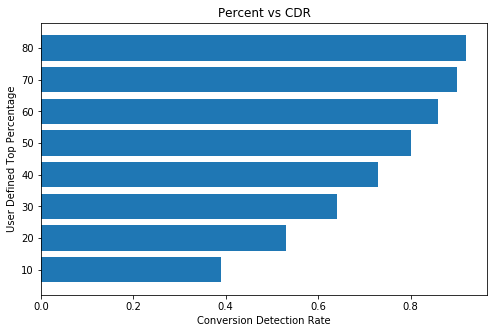

In [60]:
## CDR: Conversion Detection Rate
percent = []
CDR = []
Count_Convertion_Captured = []
total_conversion = []

for pct in range(10, 90, 10):
    num = int(pct/100*len(test_analysis_order))
    top = test_analysis_order.iloc[:num,:]
    
    percent.append(pct)
    CDR.append(round(len(top[top['Y'] == 1]) / len(test_analysis[test_analysis['Y']==1]), 2))
    Count_Convertion_Captured.append(len(top[top['Y'] == 1]))
    total_conversion.append(len(test_analysis[test_analysis['Y']==1]))
    
y_pos = np.arange(len(percent))

plt.barh(y_pos, CDR)
plt.yticks(y_pos, percent)
plt.xlabel('Conversion Detection Rate')
plt.ylabel('User Defined Top Percentage')
plt.title('Percent vs CDR')
plt.show()

### Key Numbers in TEST set -- Between 60 to 120 days

In [90]:
print(f"Total # of Leads: {len(test)}")
print(f"Total # of Conversion within 60 days: {len(y_test_120[y_test_120==1])}")   
print(f"% of Leads Converted (0, 60]: {round(len(y_test_120[y_test_120==1])/len(test), 4)}")

Total # of Leads: 505230
Total # of Conversion within 60 days: 5707
% of Leads Converted (0, 60]: 0.0113


## Correlation Metrix

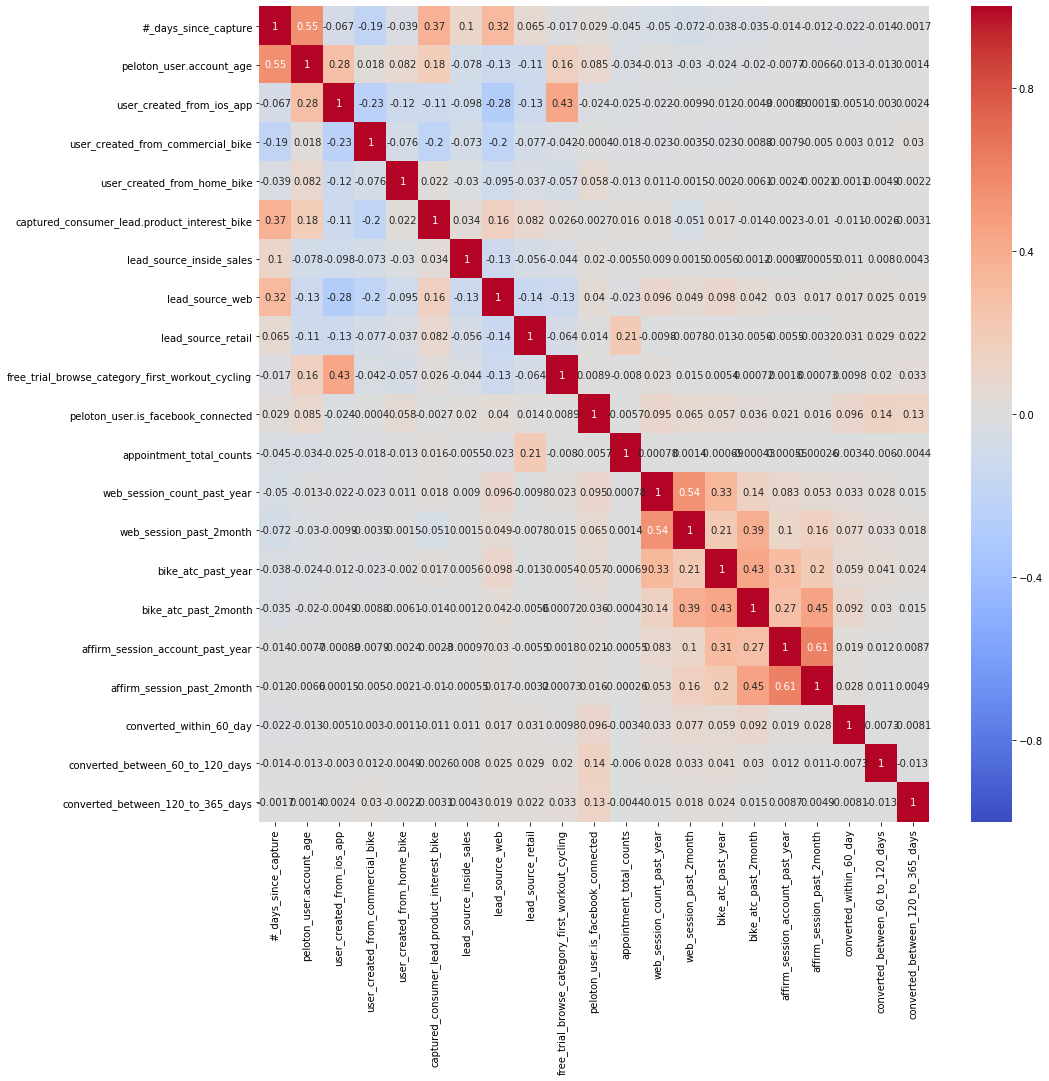

In [61]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, vmin = -1, cmap='coolwarm')

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix

In [69]:
X_train = x_train[['peloton_user.is_facebook_connected', 'web_session_past_2month', 'lead_source_retail', 
'lead_source_web', 'peloton_user.account_age', '#_days_since_capture']]

X_test = x_test[['peloton_user.is_facebook_connected', 'web_session_past_2month', 'lead_source_retail', 
'lead_source_web', 'peloton_user.account_age', '#_days_since_capture']]

In [71]:
## Converted within 60 days

rfc = RandomForestClassifier(n_estimators=100).fit(X_train, y_train_60)
rfc_pred = rfc.predict(X_test)

print("Recall:",recall_score(y_test_60, rfc_pred))

print("AUC:", roc_auc_score(y_test_60, rfc_pred))

Recall: 0.026239067055393587
AUC: 0.5129117155960918


In [66]:
print(confusion_matrix(y_test_60, rfc_pred))

[[502521    323]
 [  2313     88]]


In [73]:
## Converted between 60 to 120 days

y_train_120 = train['converted_between_60_to_120_days']
y_test_120 = test['converted_between_60_to_120_days']
rfc = RandomForestClassifier(n_estimators=100).fit(x_train, y_train_120)
rfc_pred = rfc.predict(x_test.drop(columns = ['Y', 'Predict']))

print("Recall:",recall_score(y_test_120, rfc_pred))

print("AUC:", roc_auc_score(y_test_120, rfc_pred))

Recall: 0.04783599088838269
AUC: 0.5230181369792157


In [74]:
print(confusion_matrix(y_test_120, rfc_pred))

[[498624    899]
 [  5434    273]]
